In [49]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df2 = pd.read_csv("../data/game_stats.csv")
df2.head()

def process_third(x):
    if(str(x).split('-')[-1] == '0'): return 1
    else: return float(str(x).split('-')[0])/float(str(x).split('-')[1])

stats = df2[['id', 'home.school','home.points', 'home.thirdDownEff','home.completionAttempts', 'home.yardsPerPass','home.yardsPerRushAttempt','home.totalPenaltiesYards','home.turnovers','home.possessionTime','away.school','away.points','away.thirdDownEff','away.completionAttempts', 'away.yardsPerPass','away.yardsPerRushAttempt','away.totalPenaltiesYards','away.turnovers','away.possessionTime','home.rushingAttempts','away.rushingAttempts','Year','Week']]
stats.dropna(inplace = True)
stats.loc[:,'home.pointDiff'] = df2['home.points'] - df2['away.points']
stats.loc[:,'away.pointDiff'] = -stats['home.pointDiff']
stats.loc[:,'home.completionAttempts'] = df2['home.completionAttempts'].apply(lambda x: float(str(x).split('-')[-1]))
stats.loc[:,'away.completionAttempts'] = df2['away.completionAttempts'].apply(lambda x: float(str(x).split('-')[-1]))
stats.loc[:,'home.yardsAllowedPerPlay'] = df2['away.totalYards']/(stats['away.completionAttempts'] + df2['away.rushingAttempts'])
stats.loc[:,'away.yardsAllowedPerPlay'] = df2['home.totalYards']/(stats['home.completionAttempts'] + df2['home.rushingAttempts'])
stats.loc[:,'home.yards_per_play'] = stats['away.yardsAllowedPerPlay']
stats.loc[:,'away.yards_per_play'] = stats['home.yardsAllowedPerPlay']
stats.loc[:,'home.forcedTO'] = df2['away.turnovers']
stats.loc[:,'away.forcedTO'] = df2['home.turnovers']
stats.loc[:,'home.passAttemptsAllowed'] = stats['away.completionAttempts']
stats.loc[:,'away.passAttemptsAllowed'] = stats['home.completionAttempts']
stats.loc[:,'home.yardsAllowedPerRush'] = df2['away.yardsPerRushAttempt']
stats.loc[:,'away.yardsAllowedPerRush'] = df2['home.yardsPerRushAttempt']
stats.loc[:,'home.thirdDownEff'] = stats.loc[:,'home.thirdDownEff'].apply(process_third)
stats.loc[:,'away.thirdDownEff'] = stats.loc[:,'away.thirdDownEff'].apply(process_third)
stats.loc[:,'home.totalPenaltiesYards'] = stats.loc[:,'home.totalPenaltiesYards'].apply(lambda x: float(x.split('-')[-1]))
stats.loc[:,'away.totalPenaltiesYards'] = stats.loc[:,'away.totalPenaltiesYards'].apply(lambda x: float(x.split('-')[-1]))
stats.loc[:,'home.possessionTime'] = stats['home.possessionTime'].apply(lambda x: float(x.split(':')[0])*60 + float(x.split(':')[1]))
stats.loc[:,'away.possessionTime'] = stats['away.possessionTime'].apply(lambda x: float(x.split(':')[0])*60 + float(x.split(':')[1]))
stats['home.win'] = (stats['home.points'] > stats['away.points']).astype(int)
stats['away.win'] = (stats['away.points'] > stats['home.points']).astype(int)
stats.iloc[1239,22] = 10
stats = stats.drop(9284, axis = 0)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [50]:
away_index = [x for x in list(stats.columns) if 'away.' in x] + ['Week', 'Year', 'id']
away = stats[away_index].drop('away.points', axis = 1)
away.columns = [x.split('.')[-1] for x in list(away.columns)]
away['isHome'] = 0
away = away.groupby(['Year', 'school','Week']).mean()
away

thirdDownEff  completionAttempts  yardsPerPass  \
Year school           Week                                                   
2004 Air Force        4         0.375000                14.0           9.9   
                      5         0.523810                16.0          10.6   
                      10        0.538462                21.0           9.0   
                      11        0.416667                 8.0          10.5   
     Akron            2         0.384615                36.0           6.2   
...                                  ...                 ...           ...   
2020 West Virginia    8         0.266667                50.0           6.9   
     Western Kentucky 2         0.333333                23.0           5.6   
                      5         0.411765                36.0           5.2   
                      7         0.083333                35.0           4.6   
     Wyoming          8         0.187500                32.0           7.3   

                            yardsPerRushAttempt  totalPenaltiesYards  \
Year school           Week                                             
2004 Air Force        4                     3.9                  0.0   
                      5                     4.6                  0.0   
                      10                    4.8                  0.0   
                      11                    5.2                  0.0   
     Akron            2                     2.3                  0.0   
...                                         ...                  ...   
2020 West Virginia    8                     3.1                 69.0   
     Western Kentucky 2                     3.4                 23.0   
                      5                     3.6                 55.0   
                      7                     2.8                 39.0   
     Wyoming          8                     3.7                  6.0   

                            turnovers  possessionTime  rushingAttempts  \
Year school           Week                                               
2004 Air Force        4           0.0          1454.0             71.0   
                      5           3.0          1273.0             66.0   
                      10          2.0           783.0             48.0   
                      11          0.0          1184.0             66.0   
     Akron            2           3.0          1034.0             31.0   
...                               ...             ...              ...   
2020 West Virginia    8           1.0          1765.0             29.0   
     Western Kentucky 2           1.0          1647.0             35.0   
                      5           1.0          1895.0             38.0   
                      7           4.0          1713.0             32.0   
     Wyoming          8           1.0          1502.0             35.0   

                            pointDiff  yardsAllowedPerPlay  yards_per_play  \
Year school           Week                                                   
2004 Air Force        4          17.0             5.058824        4.905882   
                      5         -14.0             7.318841        5.743902   
                      10        -17.0             6.352273        6.086957   
                      11          9.0             5.878378        5.797297   
     Akron            2         -38.0             8.515625        4.402985   
...                               ...                  ...             ...   
2020 West Virginia    8          -7.0             5.194030        5.544304   
     Western Kentucky 2         -14.0             6.763889        4.275862   
                      5           3.0             4.833333        4.405405   
                      7         -23.0             5.424242        3.731343   
     Wyoming          8          -3.0             6.280000        5.388060   

                            forcedTO  passAttemptsAllowed  \
Year school           Week           

In [51]:
home_index = [x for x in list(stats.columns) if 'home.' in x] + ['Week', 'Year', 'id']
home = stats[home_index].drop('home.points',axis = 1)
home.columns = [x.split('.')[-1] for x in list(home.columns)]
home['isHome'] = 1
home = home.groupby(['Year', 'school','Week']).mean()

In [52]:
# total = pd.concat([home,away]).groupby(['Year', 'school','Week']).mean()

# total.iloc[-10:,:]

In [53]:

# idx.reverse()
# n = 1
# ids = total['id']
# field_status = total['isHome']
# outcomes = total['win']
# weeks = total['weeks_played']
# total.drop(['id','isHome','weeks_played'], axis = 1, inplace = True) 
# todrop = []
# for i,x in enumerate(idx[:-1]):
#     if(x[1] != idx[i + 1][1]):
#         todrop.append(x)
#         continue
#     j = 2
#     agg = total.loc[idx[i+1],:]
#     while((i + j < len(idx)) and x[1] == idx[i + j][1]):
#         agg = agg + total.loc[idx[i+j],:]
#         j += 1
#         n += 1
#     total.loc[x,:] = agg/n
#     n = 1;
# total['id'] = ids
# total['isHome'] = field_status
# total['won_game'] = outcomes
# total['weeks'] = weeks
# total.drop(todrop, axis = 0, inplace = True)

In [54]:
# # need to drop the rows in todrop, put stats back in matchup df from unique gameids in total
# rowlist = []
# for gameID in stats['id']:
#     if len(total[total['id'] == gameID]) != 2: continue
#     hometeam = list((total[(total['id'] == gameID) & (total['isHome'] == 1)].values)[0])
#     awayteam = list((total[(total['id'] == gameID) & (total['isHome'] == 0)].values)[0])
#     rowlist.append(hometeam + awayteam)
#     rowlist.append(awayteam + hometeam)
# matchups = pd.DataFrame(rowlist, columns = (list(total.columns) + ['other.' + x for x in list(total.columns)])).drop(['other.id','other.isHome','other.won_game'], axis = 1)
# matchups = matchups.set_index('id')
# matchups['win_pct_diff'] = matchups['win'] - matchups['other.win']
# matchups.drop(['win', 'other.win'], axis = 1, inplace = True)
# outcome = matchups['won_game']
# matchups.drop('won_game', axis = 1, inplace = True)
# matchups['outcome'] = outcome

In [55]:
# avg_weeks = (matchups['weeks'] + matchups['other.weeks']) / 2
# matchups.drop('other.weeks', axis = 1, inplace = True)
# matchups['weeks'] = avg_weeks
# matchups.tail(20)


In [56]:
# import everything
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Try Regression models for score differential- Lasso, Ridge

## Data processing

In [61]:
total = pd.concat([home,away]).groupby(['Year', 'school','Week']).mean()
total['weeks_played'] = 0
idx = list(total.index)
n = 0
for i,x in enumerate(idx[:-1]):
    total.iloc[i,-1] = n
    if(x[1] != idx[i + 1][1]):
        n = 0
        continue
    n += 1
total.iloc[-10:,:]

thirdDownEff  completionAttempts  yardsPerPass  \
Year school           Week                                                   
2020 West Virginia    7         0.375000                44.0           7.2   
                      8         0.266667                50.0           6.9   
     Western Kentucky 2         0.333333                23.0           5.6   
                      3         0.300000                25.0           7.7   
                      5         0.411765                36.0           5.2   
                      6         0.166667                39.0           5.4   
                      7         0.083333                35.0           4.6   
                      8         0.250000                25.0           5.3   
     Wisconsin        8         0.571429                21.0          11.8   
     Wyoming          8         0.187500                32.0           7.3   

                            yardsPerRushAttempt  totalPenaltiesYards  \
Year school           Week                                             
2020 West Virginia    7                     5.9                 76.0   
                      8                     3.1                 69.0   
     Western Kentucky 2                     3.4                 23.0   
                      3                     3.5                 19.0   
                      5                     3.6                 55.0   
                      6                     3.4                  0.0   
                      7                     2.8                 39.0   
                      8                     3.7                 25.0   
     Wisconsin        8                     3.4                 15.0   
     Wyoming          8                     3.7                  6.0   

                            turnovers  possessionTime  rushingAttempts  \
Year school           Week                                               
2020 West Virginia    7           2.0          1975.0             38.0   
                      8           1.0          1765.0             29.0   
     Western Kentucky 2           1.0          1647.0             35.0   
                      3           0.0          1501.0             28.0   
                      5           1.0          1895.0             38.0   
                      6           3.0          1519.0             25.0   
                      7           4.0          1713.0             32.0   
                      8           2.0          1615.0             33.0   
     Wisconsin        8           1.0          2608.0             54.0   
     Wyoming          8           1.0          1502.0             35.0   

                            pointDiff  yardsAllowedPerPlay  yards_per_play  \
Year school           Week                                                   
2020 West Virginia    7          21.0             2.907407        6.634146   
                      8          -7.0             5.194030        5.544304   
     Western Kentucky 2         -14.0             6.763889        4.275862   
                      3          -6.0             6.164557        5.490566   
                      5           3.0             4.833333        4.405405   
                      6         -24.0             5.548387        4.593750   
                      7         -23.0             5.424242        3.731343   
                      8           3.0             3.461538        4.379310   
     Wisconsin        8          38.0             4.804348        5.733333   
     Wyoming          8          -3.0             6.280000        5.388060   

                            forcedTO  passAttemptsAllowed  \
Year school           Week                                  
2020 West Virginia    7          2.0                 23.0   
                      8          1.0                 28.0   
     Western Kentucky 2          2.0                 34.0   
                      3          0.0                 21.0   
                      5          0

In [63]:
total.head(20)

thirdDownEff  completionAttempts  yardsPerPass  \
Year school    Week                                                   
2004 Air Force 2         0.555556                18.0           4.9   
               3         0.600000                16.0           9.1   
               4         0.375000                14.0           9.9   
               5         0.523810                16.0          10.6   
               6         0.473684                24.0           9.7   
               7         0.357143                 9.0          10.6   
               9         0.266667                24.0           6.3   
               10        0.538462                21.0           9.0   
               11        0.416667                 8.0          10.5   
               12        0.428571                20.0           6.7   
               13        0.642857                19.0          10.7   
     Akron     2         0.384615                36.0           6.2   
               3         0.416667                44.0           9.1   
               4         0.062500                27.0           2.9   
               5         0.333333                29.0           6.1   
               6         0.181818                26.0           7.4   
               7         0.416667                23.0           8.8   
               8         0.428571                24.0           7.0   
               9         0.461538                33.0           7.5   
               11        0.250000                45.0           7.2   

                     yardsPerRushAttempt  totalPenaltiesYards  turnovers  \
Year school    Week                                                        
2004 Air Force 2                     3.4                  0.0        2.0   
               3                     6.8                  0.0        1.0   
               4                     3.9                  0.0        0.0   
               5                     4.6                  0.0        3.0   
               6                     3.2                  0.0        2.0   
               7                     4.5                  0.0        0.0   
               9                     4.5                  0.0        0.0   
               10                    4.8                  0.0        2.0   
               11                    5.2                  0.0        0.0   
               12                    5.4                  0.0        6.0   
               13                    5.3                  0.0        0.0   
     Akron     2                     2.3                  0.0        3.0   
               3                     3.0                  0.0        3.0   
               4                     0.2                  0.0        2.0   
               5                     3.2                  0.0        1.0   
               6                     1.9                  0.0        1.0   
               7                     6.1                  0.0        0.0   
               8                     4.0                  0.0        1.0   
               9                     4.5                  0.0        3.0   
               11                    2.5                  0.0        2.0   

                     possessionTime  rushingAttempts  pointDiff  \
Year school    Week                                               
2004 Air Force 2             1213.0             53.0      -42.0   
               3             1131.0             52.0       22.0   
               4             1454.0             71.0       17.0   
               5             1273.0             66.0      -14.0   
               6             1253.0             57.0       -3.0   
               7             1144.0             53.0        5.0   
               9             1067.0             47.0      -17.0   
               10             783.0             48.0      -17.0   
               11            1184.0             66.0        9.0   
               12            1090.0             

In [64]:
idx.reverse()
n = 1
ids = total['id']
field_status = total['isHome']
scoreDiff = total['pointDiff']
weeks = total['weeks_played']
total.drop(['id','isHome','weeks_played'], axis = 1, inplace = True) 
todrop = []
for i,x in enumerate(idx[:-1]):
    if(x[1] != idx[i + 1][1]):
        todrop.append(x)
        continue
    j = 2
    agg = total.loc[idx[i+1],:]
    while((i + j < len(idx)) and x[1] == idx[i + j][1]):
        agg = agg + total.loc[idx[i+j],:]
        j += 1
        n += 1
    total.loc[x,:] = agg/n
    n = 1;
total['id'] = ids
total['isHome'] = field_status
total['scoreDiff'] = scoreDiff
total['weeks'] = weeks
total.drop(todrop, axis = 0, inplace = True)
total = total.iloc[1:,:]

In [73]:
total.tail(20)

thirdDownEff  completionAttempts  yardsPerPass  \
Year school           Week                                                   
2020 Virginia         6         0.363971           45.000000      5.950000   
                      7         0.316721           51.333333      5.633333   
                      8         0.304208           49.750000      5.350000   
     Virginia Tech    5         0.222222           17.000000     10.600000   
                      6         0.361111           20.500000      8.700000   
                      7         0.383598           23.333333      8.500000   
                      8         0.371032           21.250000      8.225000   
     Wake Forest      3         0.277778           38.000000      7.700000   
                      5         0.372222           37.000000      7.150000   
                      7         0.486243           31.666667      9.133333   
                      8         0.431349           30.500000      9.700000   
     West Virginia    4         0.615385           35.000000      8.400000   
                      5         0.484163           36.000000      8.050000   
                      7         0.415368           38.000000      7.033333   
                      8         0.405276           39.500000      7.075000   
     Western Kentucky 3         0.333333           23.000000      5.600000   
                      5         0.316667           24.000000      6.650000   
                      6         0.348366           28.000000      6.166667   
                      7         0.302941           30.750000      5.975000   
                      8         0.259020           31.600000      5.700000   

                            yardsPerRushAttempt  totalPenaltiesYards  \
Year school           Week                                             
2020 Virginia         6                4.500000            25.000000   
                      7                3.933333            43.666667   
                      8                4.375000            45.750000   
     Virginia Tech    5                8.000000            40.000000   
                      6                7.250000            30.000000   
                      7                6.633333            27.666667   
                      8                7.100000            36.500000   
     Wake Forest      3                1.000000             6.000000   
                      5                2.000000            10.500000   
                      7                3.533333            20.333333   
                      8                3.675000            45.000000   
     West Virginia    4                6.500000            85.000000   
                      5                4.050000            95.500000   
                      7                3.833333            97.666667   
                      8                4.350000            92.250000   
     Western Kentucky 3                3.400000            23.000000   
                      5                3.450000            21.000000   
                      6                3.500000            32.333333   
                      7                3.475000            24.250000   
                      8                3.340000            27.200000   

                            turnovers  possessionTime  rushingAttempts  \
Year school           Week                                               
2020 Virginia         6      2.500000     2036.000000        37.500000   
                      7      3.000000     1995.333333        34.666667   
                      8      3.000000     1989.500000        35.500000   
     Virginia Tech    5      0.000000     1502.000000        40.000000   
                      6      1.500000     1773.000000        45.000000   
                      7      1.000000     1824.000000        46.000000   
                      8      0.750000     1830.000000        44.750000   
     Wake Forest      3      0.000000     1462.000000       

In [74]:
# need to drop the rows in todrop, put stats back in matchup df from unique gameids in total
rowlist = []
for gameID in stats['id']:
    if len(total[total['id'] == gameID]) != 2: continue
    hometeam = list((total[(total['id'] == gameID) & (total['isHome'] == 1)].values)[0])
    awayteam = list((total[(total['id'] == gameID) & (total['isHome'] == 0)].values)[0])
    rowlist.append(hometeam + awayteam)
    rowlist.append(awayteam + hometeam)
matchups = pd.DataFrame(rowlist, columns = (list(total.columns) + ['other.' + x for x in list(total.columns)])).drop(['other.id','other.isHome','other.scoreDiff'], axis = 1)
matchups = matchups.set_index('id')

matchups['win_pct_diff'] = matchups['win'] - matchups['other.win']
matchups.drop(['win', 'other.win'], axis = 1, inplace = True)
# here I did not add point diff diff feature 
scoreDiff = matchups['scoreDiff']
matchups.drop('scoreDiff', axis = 1, inplace = True)
matchups['scoreDiff'] = scoreDiff
avg_weeks = (matchups['weeks'] + matchups['other.weeks']) / 2
matchups.drop('other.weeks', axis = 1, inplace = True)
matchups['weeks'] = avg_weeks
matchups.tail(20)

,thirdDownEff,completionAttempts,yardsPerPass,yardsPerRushAttempt,totalPenaltiesYards,turnovers,possessionTime,rushingAttempts,pointDiff,yardsAllowedPerPlay,yards_per_play,forcedTO,passAttemptsAllowed,yardsAllowedPerRush,isHome,weeks,other.thirdDownEff,other.completionAttempts,other.yardsPerPass,other.yardsPerRushAttempt,other.totalPenaltiesYards,other.turnovers,other.possessionTime,other.rushingAttempts,other.pointDiff,other.yardsAllowedPerPlay,other.yards_per_play,other.forcedTO,other.passAttemptsAllowed,other.yardsAllowedPerRush,win_pct_diff,scoreDiff
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
401240998.0,0.472424,29.400000,12.040000,4.600000,37.400000,0.600000,1988.00,39.400000,29.600000,4.612775,7.859132,0.800000,28.600000,2.440000,1.0,5.5,0.352671,33.333333,7.350000,3.866667,57.833333,1.166667,1648.50,35.833333,-3.666667,5.642105,5.423648,1.000000,39.666667,3.900000,0.833333,38.0
401240998.0,0.352671,33.333333,7.350000,3.866667,57.833333,1.166667,1648.50,35.833333,-3.666667,5.642105,5.423648,1.000000,39.666667,3.900000,0.0,5.5,0.472424,29.400000,12.040000,4.600000,37.400000,0.600000,1988.00,39.400000,29.600000,4.612775,7.859132,0.800000,28.600000,2.440000,-0.833333,-38.0
401250783.0,0.449495,20.500000,4.800000,5.750000,76.000000,0.500000,1514.50,37.500000,-2.500000,5.916026,5.503469,1.000000,37.000000,4.200000,1.0,1.5,0.300000,30.000000,8.100000,2.900000,57.000000,1.000000,1517.00,22.000000,-17.000000,6.421687,5.903846,1.000000,30.000000,5.000000,0.000000,-9.0
401250783.0,0.300000,30.000000,8.100000,2.900000,57.000000,1.000000,1517.00,22.000000,-17.000000,6.421687,5.903846,1.000000,30.000000,5.000000,0.0,1.5,0.449495,20.500000,4.800000,5.750000,76.000000,0.500000,1514.50,37.500000,-2.500000,5.916026,5.503469,1.000000,37.000000,4.200000,0.000000,9.0
401207157.0,0.394880,34.500000,6.183333,4.750000,80.333333,0.833333,1674.00,37.166667,-1.333333,6.136636,5.565126,1.833333,30.666667,4.300000,1.0,5.5,0.372428,33.600000,6.960000,2.820000,41.800000,1.000000,1751.60,34.600000,-3.200000,5.963363,4.988882,1.400000,35.600000,3.780000,-0.100000,1.0
401207157.0,0.372428,33.600000,6.960000,2.820000,41.800000,1.000000,1751.60,34.600000,-3.200000,5.963363,4.988882,1.400000,35.600000,3.780000,0.0,5.5,0.394880,34.500000,6.183333,4.750000,80.333333,0.833333,1674.00,37.166667,-1.333333,6.136636,5.565126,1.833333,30.666667,4.300000,0.100000,-1.0
401207160.0,0.433193,25.800000,7.280000,5.760000,60.800000,1.000000,1944.00,46.200000,15.800000,4.740996,6.360052,1.400000,29.400000,3.540000,1.0,4.5,0.441001,32.500000,8.400000,3.425000,29.250000,1.000000,1814.75,36.250000,-11.000000,6.498091,5.822360,1.750000,33.250000,5.000000,0.750000,21.0
401207160.0,0.441001,32.500000,8.400000,3.425000,29.250000,1.000000,1814.75,36.250000,-11.000000,6.498091,5.822360,1.750000,33.250000,5.000000,0.0,4.5,0.433193,25.800000,7.280000,5.760000,60.800000,1.000000,1944.00,46.200000,15.800000,4.740996,6.360052,1.400000,29.400000,3.540000,-0.750000,-21.0
401215316.0,0.648249,22.000000,10.750000,4.625000,38.250000,0.750000,2034.50,44.250000,17.250000,5.836664,6.654422,1.750000,31.750000,4.600000,1.0,4.0,0.545732,14.000000,7.600000,5.900000,33.500000,1.000000,2021.75,48.000000,11.250000,5.838296,6.469254,0.750000,34.000000,4.700000,0.250000,14.0


## Split data

In [75]:
from sklearn.model_selection import train_test_split

matchups = matchups.astype(float).dropna()
X, y = matchups.iloc[:,:-1], matchups.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 53)


## Basic Lasso Regression Model

In [76]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

lasso.score(X_train, y_train)

0.3331688891568094

In [77]:
mean_squared_error(lasso.predict(X_train), y_train)

326.8964934325374

In [78]:
lasso.coef_

array([ 0.00000000e+00,  8.63755000e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.37496941e-01, -0.00000000e+00,  1.43827382e+00, -5.59443019e-01,
        0.00000000e+00, -1.30744818e+00,  9.09365474e+00,  0.00000000e+00,
        0.00000000e+00, -6.51289880e-03, -1.28338936e-01, -0.00000000e+00,
        1.55417913e-03, -5.20000780e-02,  0.00000000e+00,  0.00000000e+00,
       -3.42563812e-01,  1.76455092e-01, -1.18021675e+00,  5.36239526e-01,
       -5.63280363e-03,  1.15886820e+00,  5.73633123e+00])

## Lasso Regression CV

In [22]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [23]:
lassocv.alpha_

0.0005691304529144445

In [24]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.3336132759407435

In [25]:
lasso.score(X_test, y_test)

0.33291605575008854

In [26]:
pred_test = lasso.predict(X_test)
pred_test = np.sign(pred_test)
accuracy_score(pred_test, np.sign(y_test))

0.7076894433066468

## Lasso CV - accuracy as metric

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

def computeAcc(y,y_pred):
    return accuracy_score(np.sign(y),np.sign(y_pred))

accScorer = make_scorer(computeAcc, greater_is_better=True)
parameters = {"alpha": 0.0005*np.logspace(-3,3,num = 500,base=10)}

grid = GridSearchCV(lasso, param_grid=parameters,
                   scoring = accScorer)


In [ ]:
grid.fit(X_train, y_train)


In [79]:
# best_alpha = grid.best_params_['alpha']
best_alpha = 0.007858918588865806


In [80]:
lasso.set_params(alpha=best_alpha)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.3220343539060314

In [81]:
pred_test = lasso.predict(X_test)
pred_test = np.sign(pred_test)
accuracy_score(pred_test, np.sign(y_test))

0.7102960342580525

In [114]:
df = pd.DataFrame()
df['prediction'] = pred_test
df['result'] = np.sign(np.array(y_test))
df['weeks'] = np.array(X_test['weeks'])
df['accuracy'] = df['prediction'] == df['result']
df.groupby('weeks')['accuracy'].sum()
df.groupby('weeks').count()
acc = df.groupby('weeks')['accuracy'].sum() / df.groupby('weeks').count().iloc[:,0]


pandas.core.series.Series

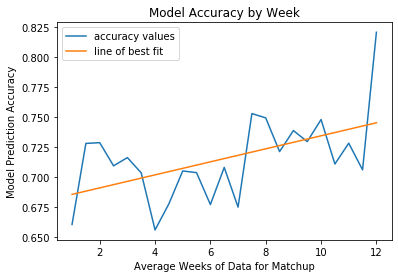

In [121]:
from matplotlib import pyplot as plt
x = np.array(acc.index)
y = acc.values
m, b = np.polyfit(x, y, 1)
plt.plot(acc)
plt.plot(x, m*x + b)
plt.title("Model Accuracy by Week")
plt.xlabel("Average Weeks of Data for Matchup")
plt.ylabel("Model Prediction Accuracy")
plt.legend(['accuracy values','line of best fit'])
plt.show()

## Ridge Regression

In [48]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas=alphas, cv = 10, normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [49]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.3339919217059568

In [50]:
pred_test = ridge.predict(X_test)
pred_test = np.sign(pred_test)
accuracy_score(pred_test, np.sign(y_test))

0.7061999627629864

## Ridge CV - accuracy as metric

In [84]:
parameters = {"alpha": 0.005*np.logspace(-3,3,num = 500,base=10)}
grid = GridSearchCV(ridge, param_grid=parameters,
                   scoring = accScorer)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(alpha=0.8042347416326776),
             param_grid={'alpha': array([5.00000000e-06, 5.14036612e-06, 5.28467277e-06, 5.43303057e-06,
       5.58555325e-06, 5.74235774e-06, 5.90356423e-06, 6.06929631e-06,
       6.23968103e-06, 6.41484899e-06, 6.59493448e-06, 6.78007555e-06,
       6.97041413e-06, 7.16609613e-06, 7.36727155e-06, 7.57409461e-06,
       7.78672386e-06, 8.00532231e-0...
       2.64494654e+00, 2.71919871e+00, 2.79553539e+00, 2.87401508e+00,
       2.95469795e+00, 3.03764584e+00, 3.12292236e+00, 3.21059285e+00,
       3.30072455e+00, 3.39338653e+00, 3.48864982e+00, 3.58658747e+00,
       3.68727455e+00, 3.79078823e+00, 3.89720788e+00, 4.00661506e+00,
       4.11909367e+00, 4.23472990e+00, 4.35361242e+00, 4.47583236e+00,
       4.60148340e+00, 4.73066188e+00, 4.86346681e+00, 5.00000000e+00])},
             scoring=make_scorer(computeAcc))

In [85]:
best_alpha = grid.best_params_['alpha']
best_alpha

0.8042347416326776

In [86]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.3339919006595584

In [87]:
pred_test = ridge.predict(X_test)
pred_test = np.sign(pred_test)
accuracy_score(pred_test, np.sign(y_test))

0.7061999627629864